In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load your dataset
data = pd.read_csv("twitter_data.csv")

In [4]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
# Mapping class labels
data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]

In [6]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive Speech
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech
24781,youu got wild bitches tellin you lies,Offensive Speech


In [7]:
# Define a function for text cleaning
def clean(text):
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w\d\w', '', text)
    
    # Tokenize and lemmatize the text
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

# Apply the text cleaning function to the dataset
data["tweet"] = data["tweet"].apply(clean)

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_9124\373071790.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean)


In [8]:
data

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive Speech
1,rt mlee boy dat coldtyga dwn bad cuffin dat ho...,Offensive Speech
2,rt urkindofbrand dawg rt babife ever fuck bitc...,Offensive Speech
3,rt cganderson vivabased look like tranny,Offensive Speech
4,rt shenikaroberts shit hear might true might f...,Offensive Speech
...,...,...
24778,yous muthafin lie 0lifeasking earl coreyemanue...,Offensive Speech
24779,youve gone broke wrong heart baby drove rednec...,No Hate and Offensive Speech
24780,young buck wan na eat dat nigguh like aint fuc...,Offensive Speech
24781,youu got wild bitch tellin lie,Offensive Speech


In [9]:
vector = TfidfVectorizer(max_features=5000)
X = vector.fit_transform(data["tweet"])
y = data["labels"]

In [11]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train

<16604x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 114372 stored elements in Compressed Sparse Row format>

In [13]:
# Model building (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Testing the model
y_pred = model.predict(X_test)

In [15]:
y_pred

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'Offensive Speech', 'No Hate and Offensive Speech',
       'Offensive Speech'], dtype=object)

In [16]:
# Accuracy Score of our model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8891062477075438


In [17]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[  56,   39,  370],
       [   8, 1110,  261],
       [  48,  181, 6106]], dtype=int64)

In [18]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

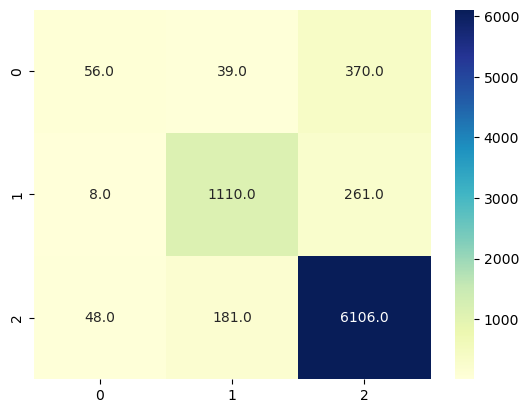

In [19]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")

In [20]:
sample = "You are too bad and I dont like your attitude"
sample= clean(sample)
sample

'bad dont like attitude'

In [24]:
inp = "You are too bad and I dont like your attitude"
data1= vector.transform([inp]).toarray()
data1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
model.predict(data1)

array(['Offensive Speech'], dtype=object)

In [43]:
inp = "I really love you so much"
inp = vector.transform([inp])
print("Predicted class:", model.predict(inp)[0])

Predicted class: Offensive Speech


In [41]:
inp = "It is really awesome"
inp = vector.transform([inp])
print("Predicted class:", model.predict(inp))

Predicted class: ['No Hate and Offensive Speech']


In [42]:
sample1 = "let's kill all the people who are protesting against the government"
sample1=clean(sample1)
sample1

'let kill people protesting government'